=== Feedback Simulation ===

Action taken: Recommend Product B
Feedback received: 1
Updated preference score: 46

Action taken: Recommend Product B
Feedback received: 2
Updated preference score: 43

Action taken: Recommend Product B
Feedback received: 3
Updated preference score: 41

Action taken: Recommend Product B
Feedback received: 4
Updated preference score: 40

Action taken: Recommend Product B
Feedback received: 5
Updated preference score: 40



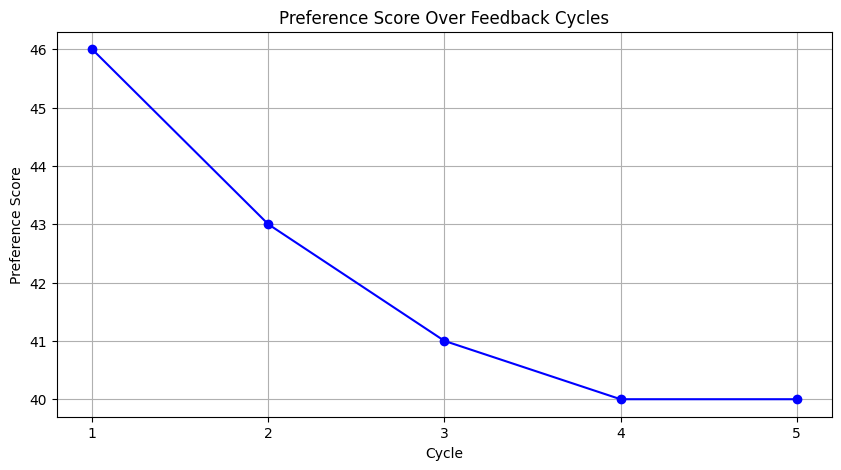

=== Summary ===
Cycle 1: Action=Recommend Product B, Feedback=1, Score=46
Cycle 2: Action=Recommend Product B, Feedback=2, Score=43
Cycle 3: Action=Recommend Product B, Feedback=3, Score=41
Cycle 4: Action=Recommend Product B, Feedback=4, Score=40
Cycle 5: Action=Recommend Product B, Feedback=5, Score=40


In [2]:
# -------------------------------
# Feedback Loop + Reinforcement System Simulation
# -------------------------------

import matplotlib.pyplot as plt

# Initialize system state
state = {
    "preference_score": 50  # Neutral starting score
}

# Store logs for visualization
actions_log = []
feedback_log = []
score_log = []

# Number of feedback iterations
num_cycles = 5

print("=== Feedback Simulation ===\n")

for i in range(num_cycles):
    # Take user feedback
    while True:
        try:
            feedback = int(input(f"Cycle {i+1} - Rate the system from 1 (bad) to 10 (good): "))
            if 1 <= feedback <= 10:
                break
            else:
                print("Please enter a number between 1 and 10.")
        except ValueError:
            print("Invalid input. Enter a number from 1 to 10.")
    
    # Decide action based on current state
    action = "Recommend Product A" if state["preference_score"] > 50 else "Recommend Product B"
    
    # Calculate reward (feedback normalized to -4 to +5)
    reward = feedback - 5
    
    # Update system state
    state["preference_score"] += reward
    
    # Log data
    actions_log.append(action)
    feedback_log.append(feedback)
    score_log.append(state["preference_score"])
    
    # Display cycle info
    print(f"Action taken: {action}")
    print(f"Feedback received: {feedback}")
    print(f"Updated preference score: {state['preference_score']}\n")

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_cycles+1), score_log, marker='o', linestyle='-', color='blue')
plt.title("Preference Score Over Feedback Cycles")
plt.xlabel("Cycle")
plt.ylabel("Preference Score")
plt.xticks(range(1, num_cycles+1))
plt.grid(True)
plt.show()

# Display summary
print("=== Summary ===")
for i in range(num_cycles):
    print(f"Cycle {i+1}: Action={actions_log[i]}, Feedback={feedback_log[i]}, Score={score_log[i]}")
